# Import Libraries and Load Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("C:/Users/lai_h/Documents/GitHub/Capstone-Private-/dataset/edstays3_for_TL.csv")

In [6]:
df.shape

(447712, 39)

In [7]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,subject_id_triage,hadm_id,stay_id_triage,intime,outtime,gender,race,arrival_transport,disposition,disposition_binary,admitted,difftime,nights,hours,discharge_hour,admission_hour,admission_date,admission_day,admission_day_of_week,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint,subject_id_vitals,stay_id_vitals,last_temperature,last_heartrate,last_resprate,last_o2sat,last_sbp,last_dbp,last_rhythm,last_pain
0,0,10000032,22595853.0,33258284,2180-06-05 19:17:00,2180-06-05 23:30:00,F,WHITE,AMBULANCE,ADMITTED,0,1,0 days 04:13:00,0,4.2,23,19,2180-06-05,5,0,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention",10000032,32952584,98.2,85.0,18.0,98.0,81.0,38.0,NaN,0
1,1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED,0,1,0 days 05:37:00,0,5.6,21,15,2180-06-26,26,0,98.9,88.0,18.0,97.0,116.0,88.0,10,3.0,Abdominal distention,10000032,33258284,97.7,79.0,16.0,98.0,107.0,60.0,NaN,0
2,2,10000032,25742920.0,35968195,2180-05-08 20:58:00,2180-06-08 01:44:00,F,WHITE,AMBULANCE,ADMITTED,0,1,30 days 04:46:00,30,724.8,1,20,2180-05-08,8,0,99.4,105.0,18.0,96.0,106.0,57.0,10,3.0,"n/v/d, Abd pain",10000032,35968195,98.1,91.0,18.0,99.0,98.0,60.0,NaN,NaN
3,3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,0,0,0 days 13:30:00,0,13.5,5,16,2180-07-22,22,5,97.8,87.0,14.0,97.0,71.0,43.0,7,2.0,Hypotension,10000032,38112554,97.9,86.0,17.0,93.0,96.0,57.0,NaN,5
4,4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED,0,1,0 days 08:06:00,0,8.1,14,5,2180-07-23,23,6,98.7,77.0,16.0,98.0,96.0,50.0,13,2.0,"Abdominal distention, Abd pain, LETHAGIC",10000032,39399961,98.1,96.0,18.0,97.0,86.0,45.0,NaN,asleep


In [8]:
df.columns

Index(['Unnamed: 0', 'subject_id_triage', 'hadm_id', 'stay_id_triage',
       'intime', 'outtime', 'gender', 'race', 'arrival_transport',
       'disposition', 'disposition_binary', 'admitted', 'difftime', 'nights',
       'hours', 'discharge_hour', 'admission_hour', 'admission_date',
       'admission_day', 'admission_day_of_week', 'temperature', 'heartrate',
       'resprate', 'o2sat', 'sbp', 'dbp', 'pain', 'acuity', 'chiefcomplaint',
       'subject_id_vitals', 'stay_id_vitals', 'last_temperature',
       'last_heartrate', 'last_resprate', 'last_o2sat', 'last_sbp', 'last_dbp',
       'last_rhythm', 'last_pain'],
      dtype='object')

In [10]:
# remove unnecessary columns for the model
# remove subject_id, hadm_id, stay_id, intime, outtime, admission_date
df1 = df.drop(['Unnamed: 0', 'subject_id_triage', 'stay_id_triage', 'discharge_hour', 'subject_id_vitals', 'stay_id_vitals',
               'hadm_id', 'intime', 'outtime', 'admission_date', ], axis=1)
df1.shape
# only include the last row for each patient
# df2 = df1.groupby('icustay_id', 'stay_id').last()

(447712, 29)

# Data Preprocessing

In [14]:
# Author: Samuel Holt 
# url: https://github.com/ApacheStark/uwa-capstone-project
# Thanks Samuel for providing code for data preprocessing
def rescale_pain(x):
    try:
        x = int(x)
        if x > 100:
            return 10
        elif x > 10:
            return x/10
        elif x < 0:
            return 0
        else:
            return x
    except:
        return None

# apply rescale_pain function to pain_triage and pain_vitals
df1['pain'] = df1['pain'].apply(rescale_pain).fillna(0)
df1['last_pain'] = df1['last_pain'].apply(rescale_pain).fillna(0)

In [15]:
# Author: Samuel Holt 
# url: https://github.com/ApacheStark/uwa-capstone-project
# Thanks Samuel for providing code for data preprocessing

def race_class(x):
  if 'WHITE' in x or 'PORTU' in x:
    return 'WHITE'
  elif 'BLACK' in x:
    return 'BLACK'
  elif 'LATIN' in x:
    return 'LATINO'
  elif 'ASIAN' in x:
    return 'ASIAN'
  else:
    return 'OTHER'

df1['race'] = df1['race'].apply(race_class)
df1['race'].value_counts()

WHITE     260380
BLACK      97973
LATINO     36557
OTHER      33221
ASIAN      19581
Name: race, dtype: int64

gender                        0
race                          0
arrival_transport             0
disposition                   0
disposition_binary            0
admitted                      0
difftime                      0
nights                        0
hours                         0
admission_hour                0
admission_day                 0
admission_day_of_week         0
temperature               24595
heartrate                 17958
resprate                  21375
o2sat                     21649
sbp                       19225
dbp                       20068
pain                          0
acuity                     7328
chiefcomplaint               23
last_temperature              0
last_heartrate                0
last_resprate                 0
last_o2sat                    0
last_sbp                      0
last_dbp                      0
last_rhythm              418179
last_pain                     0
dtype: int64

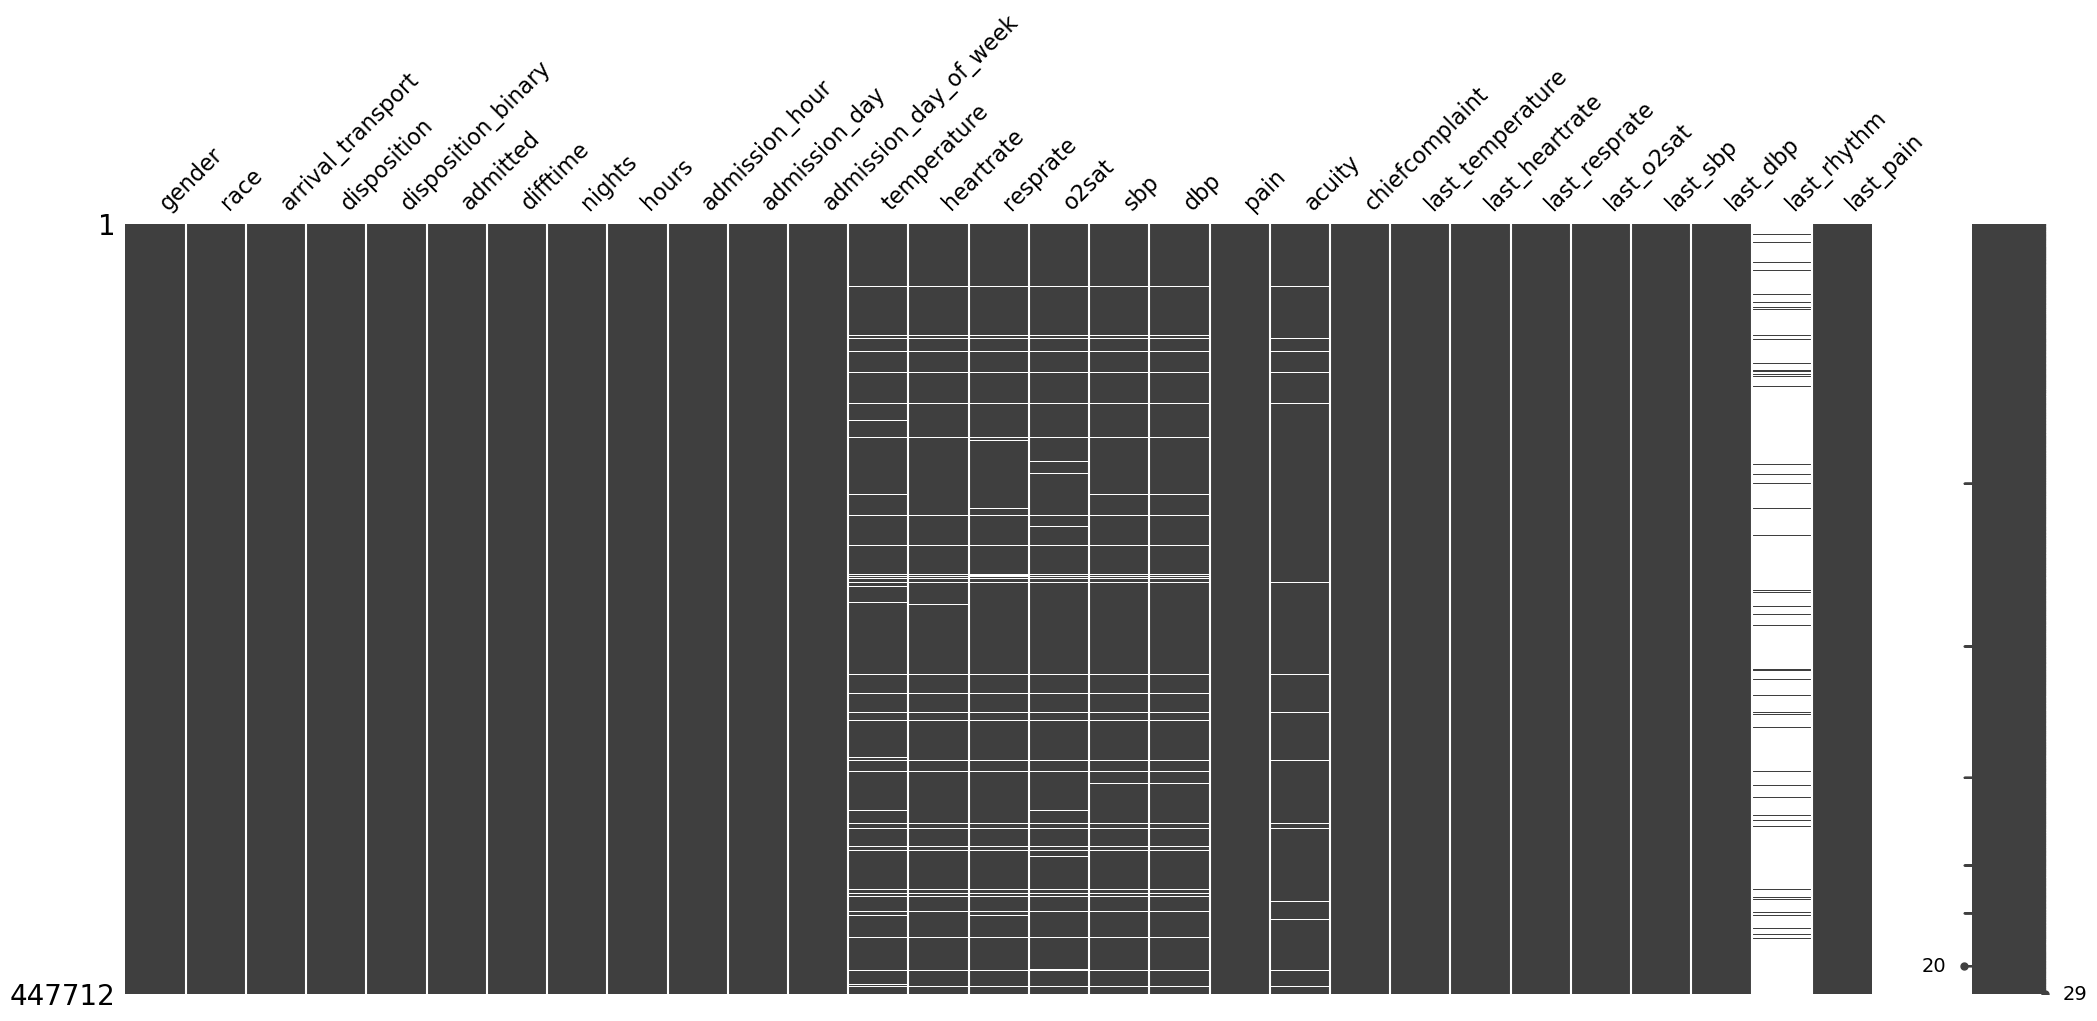

In [16]:
# Plot the missing values 
import missingno as msno
msno.matrix(df1)
# count the number of missing values in each column
df1.isnull().sum()

In [19]:
# fill selected column na with median
# column: temperature_triage, heartrate_triage, resprate_triage, o2sat_triage, sbp_triage, dbp_triage, pain_triage
# column: temperature_vitals, heartrate_vitals, resprate_vitals, o2sat_vitals, sbp_vitals, dbp_vitals, pain_vitals
df1['temperature'] = df1['temperature'].fillna(df1['temperature'].median())
df1['heartrate'] = df1['heartrate'].fillna(df1['heartrate'].median())
df1['resprate'] = df1['resprate'].fillna(df1['resprate'].median())
df1['o2sat'] = df1['o2sat'].fillna(df1['o2sat'].median())
df1['sbp'] = df1['sbp'].fillna(df1['sbp'].median())
df1['dbp'] = df1['dbp'].fillna(df1['dbp'].median())
df1['pain'] = df1['pain'].fillna(df1['pain'].median())
df1['last_temperature'] = df1['last_temperature'].fillna(df1['last_temperature'].median())
df1['last_heartrate'] = df1['last_heartrate'].fillna(df1['last_heartrate'].median())
df1['last_resprate'] = df1['last_resprate'].fillna(df1['last_resprate'].median())
df1['last_o2sat'] = df1['last_o2sat'].fillna(df1['last_o2sat'].median())
df1['last_sbp'] = df1['last_sbp'].fillna(df1['last_sbp'].median())
df1['last_dbp'] = df1['last_dbp'].fillna(df1['last_dbp'].median())
df1['last_pain'] = df1['last_pain'].fillna(df1['last_pain'].median())
df1['acuity'] = df1['acuity'].fillna(df1['acuity'].median())

In [20]:
df1.isnull().sum()

gender                        0
race                          0
arrival_transport             0
disposition                   0
disposition_binary            0
admitted                      0
difftime                      0
nights                        0
hours                         0
admission_hour                0
admission_day                 0
admission_day_of_week         0
temperature                   0
heartrate                     0
resprate                      0
o2sat                         0
sbp                           0
dbp                           0
pain                          0
acuity                        0
chiefcomplaint               23
last_temperature              0
last_heartrate                0
last_resprate                 0
last_o2sat                    0
last_sbp                      0
last_dbp                      0
last_rhythm              418179
last_pain                     0
dtype: int64

In [21]:
# create a new dataframe for the model
# select row with disposition, if disposition = EXPIRED, then mortality = 1
# if disposition = ADMITTED, then mortality = 0
df2 = df1[df1['disposition'].notnull()]
df2['disposition_binary_2'] = df2['disposition'].apply(lambda x: 1 if x == 'EXPIRED' else 0)

In [22]:
# As we are only interested ADMITTED, TRANSFER vs EXPIRED, we can drop the other rows
df_sub = df1[df1.disposition.isin(['ADMITTED','TRANSFER','EXPIRED'])]
df_sub.loc[df_sub.disposition=='TRANSFER', 'disposition'] = 'ADMITTED'

In [23]:
df_sub.shape

(174134, 29)

In [24]:
df_sub.disposition_binary.value_counts()

0    173739
1       395
Name: disposition_binary, dtype: int64

In [26]:
df_sub.to_csv('C:/Users/lai_h/Documents/GitHub/Capstone-Private-/dataset/edstays3_for_TLv_SMOTE.csv')

In [28]:
df_sub.columns

Index(['gender', 'race', 'arrival_transport', 'disposition',
       'disposition_binary', 'admitted', 'difftime', 'nights', 'hours',
       'admission_hour', 'admission_day', 'admission_day_of_week',
       'temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'pain',
       'acuity', 'chiefcomplaint', 'last_temperature', 'last_heartrate',
       'last_resprate', 'last_o2sat', 'last_sbp', 'last_dbp', 'last_rhythm',
       'last_pain'],
      dtype='object')

# Initial Modelling with Traditional ML

In [30]:
# let's use primary features for testing the model performance first
# Later model will be built with all features (including nlp features on text data)
# drop text columns: chiefcomplaint
# drop columns with too many missing values: rhythm 
df2 = df_sub.drop(['chiefcomplaint', "last_rhythm", "difftime", "disposition", "admitted"], axis=1)
df2.head()

,gender,race,arrival_transport,disposition_binary,nights,hours,admission_hour,admission_day,admission_day_of_week,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,last_temperature,last_heartrate,last_resprate,last_o2sat,last_sbp,last_dbp,last_pain
0,F,WHITE,AMBULANCE,0,0,4.2,19,5,0,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,98.2,85.0,18.0,98.0,81.0,38.0,0.0
1,F,WHITE,AMBULANCE,0,0,5.6,15,26,0,98.9,88.0,18.0,97.0,116.0,88.0,10,3.0,97.7,79.0,16.0,98.0,107.0,60.0,0.0
2,F,WHITE,AMBULANCE,0,30,724.8,20,8,0,99.4,105.0,18.0,96.0,106.0,57.0,10,3.0,98.1,91.0,18.0,99.0,98.0,60.0,0.0
4,F,WHITE,AMBULANCE,0,0,8.1,5,23,6,98.7,77.0,16.0,98.0,96.0,50.0,1,2.0,98.1,96.0,18.0,97.0,86.0,45.0,0.0
5,M,WHITE,WALK IN,0,0,6.7,20,20,3,97.5,78.0,16.0,100.0,114.0,71.0,0,2.0,98.0,68.0,16.0,96.0,103.0,74.0,0.0


In [31]:
df2.isnull().sum()

gender                   0
race                     0
arrival_transport        0
disposition_binary       0
nights                   0
hours                    0
admission_hour           0
admission_day            0
admission_day_of_week    0
temperature              0
heartrate                0
resprate                 0
o2sat                    0
sbp                      0
dbp                      0
pain                     0
acuity                   0
last_temperature         0
last_heartrate           0
last_resprate            0
last_o2sat               0
last_sbp                 0
last_dbp                 0
last_pain                0
dtype: int64

In [32]:
df2['disposition_binary'].value_counts()

0    173739
1       395
Name: disposition_binary, dtype: int64

In [33]:
# data split
from sklearn.model_selection import train_test_split

X = df2.drop('disposition_binary', axis=1)
y = df2['disposition_binary']


# apply encoding to categorical features
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

# select the columns to scale 
columns_to_scale = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
columns_to_encode = ["race", "gender", "arrival_transport"]

# apply the scaler to the selected columns
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

# apply the encoder to the selected columns 
X = pd.get_dummies(X, columns=columns_to_encode)

In [34]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# print the shape of the train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(121893, 32)
(52241, 32)
(121893,)
(52241,)


## Baseline Model - Dummy Classifier

In [36]:
# Build a null model to compare with the model performance
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report

# create a dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")
# fit the dummy classifier
dummy_clf.fit(X_train, y_train)

# predict the test set
y_pred = dummy_clf.predict(X_test)
# print the classification_report
print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.9976    1.0000    0.9988     52117
           1     0.0000    0.0000    0.0000       124

    accuracy                         0.9976     52241
   macro avg     0.4988    0.5000    0.4994     52241
weighted avg     0.9953    0.9976    0.9964     52241



d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Since there is super small number of records for death, even apply a dummy classifier to predict all patients are alive will get a high accuracy score. 
- Therefore, we need to use other metrics to evaluate the model performance. 
- In this case, we will use precision, recall, f1-score, and roc_auc_score to evaluate the model performance.
- The dummy classifier will be the baseline model to compare with the other models. 
- Which means, if the model performance and metrics are better than the dummy classifier, the model is good. 

## Decision Tree & Random Forest Model

In [37]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier(random_state=42)
# param_dict = {"criterion": ["gini", "entropy"], "max_depth": range(1, 5), "min_samples_split": range(2, 5),
#               "min_samples_leaf": range(1, 5)}
# # grid search for the best parameters (small grid for testing first)
# grid = GridSearchCV(dtc, param_grid=param_dict, cv=5, n_jobs=-1, verbose=1)
# grid.fit(X_train, y_train)

# # print the best parameters
# print(grid.best_params_)
# # print the best score
# print(grid.best_score_)

dtc.fit(X_train, y_train)
# # predict the test set
y_pred = dtc.predict(X_test)
# print the classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9978    0.9970    0.9974     52117
           1     0.0655    0.0887    0.0753       124

    accuracy                         0.9948     52241
   macro avg     0.5317    0.5428    0.5364     52241
weighted avg     0.9956    0.9948    0.9952     52241



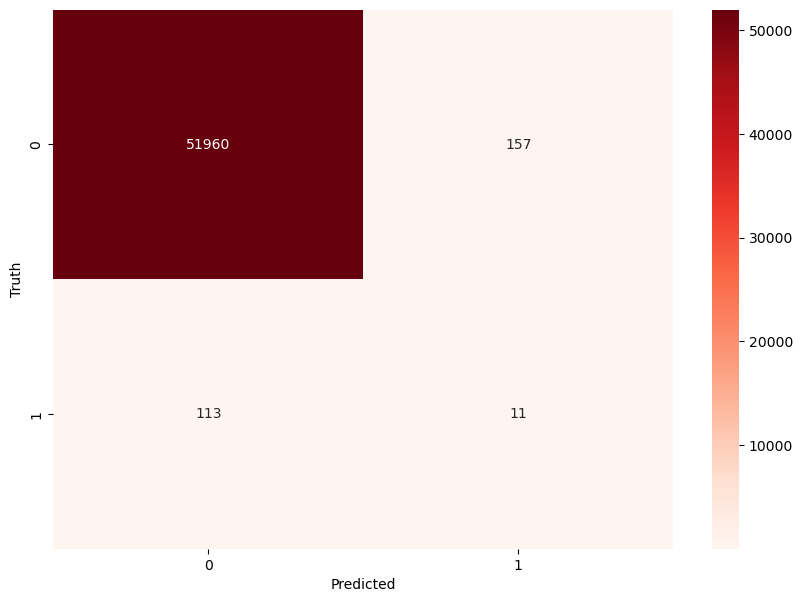

In [38]:
import seaborn as sns
# import confusion matrix
from sklearn.metrics import confusion_matrix
# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
#
sns.heatmap(cm, annot=True, cmap="Reds", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

- Simple Decision Tree Model can achieve a higher f1 score than the null model.
- This indicated that the model is learning something from the data instead of randomly guessing.
- However, the accuracy is lower than the null model.
- Hyperparameter tuning can be tested 

In [39]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
# param_dict = {"n_estimators": [100, 200, 300], "max_depth": range(1, 5), "min_samples_split": range(2, 5)}

# # grid search for the best parameters (small grid for testing first)
# grid_rfr = GridSearchCV(rfc, param_grid=param_dict, cv=5, n_jobs=-1, verbose=1)
# grid_rfr.fit(X_train, y_train)

# #print the best parameters
# print(grid_rfr.best_params_)
# # print the best score
# print(grid_rfr.best_score_)

# # predict the test set
# y_pred = grid_rfr.predict(X_test)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

# print the classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9977    0.9999    0.9988     52117
           1     0.2857    0.0161    0.0305       124

    accuracy                         0.9976     52241
   macro avg     0.6417    0.5080    0.5147     52241
weighted avg     0.9960    0.9976    0.9965     52241



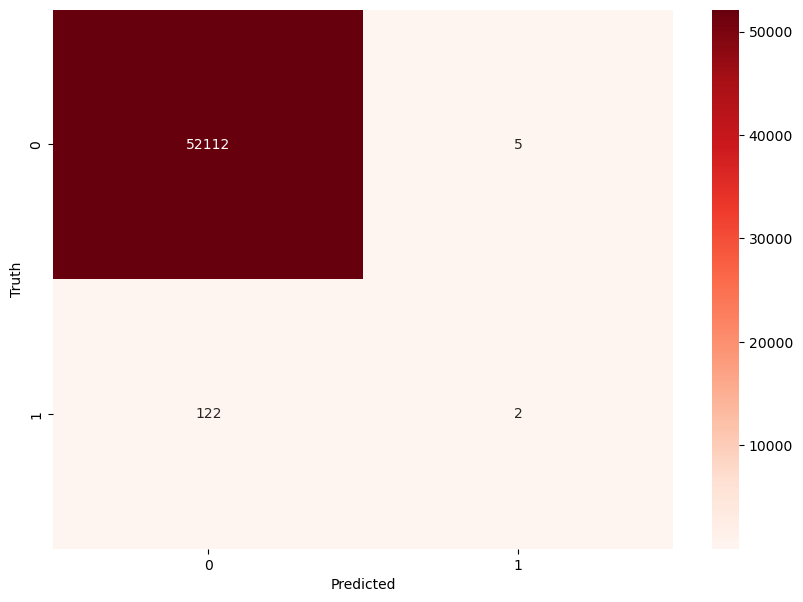

In [40]:
import seaborn as sns
# import confusion matrix
from sklearn.metrics import confusion_matrix
# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
#
sns.heatmap(cm, annot=True, cmap="Reds", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

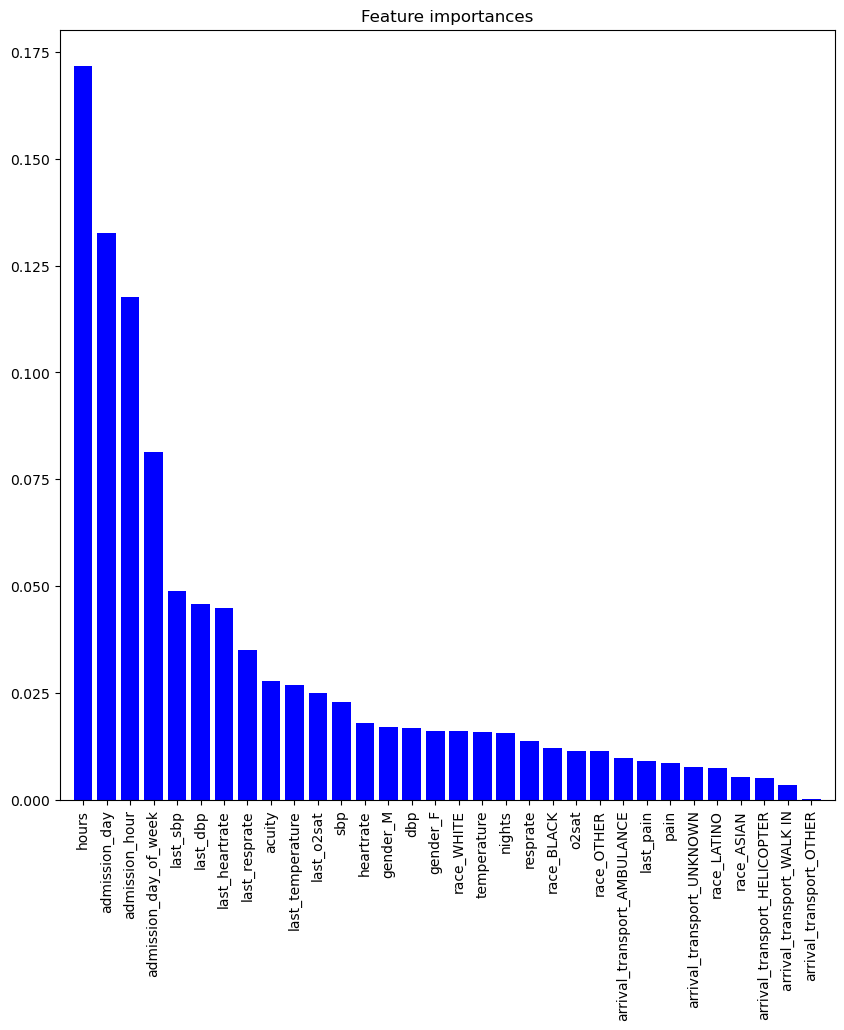

In [41]:
# plot the feature importance 
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

- The F1 score is higher than simple decision tree model, which is reasonable 
- Both tree model has shown the possibility of predicting the disposition of patients


## Support Vector Classifier

In [42]:
# SVC
# from sklearn.svm import SVC

# SVC = SVC(random_state=42)
# SVC.fit(X_train, y_train)

# # predict the test set
# y_pred = SVC.predict(X_test)
# # print the classification_report
# print(classification_report(y_test, y_pred, digits=4))

- Support Vector Machine (SVC) has a super bad performance.
- This could be due to the fact that lack of Hyperparameter tuning.
- Or simply the problem cannot be solved by multidimensional hyperplane.

## LDA 


In [43]:
# LDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldac = LinearDiscriminantAnalysis()
ldac.fit(X_train, y_train)

y_pred = ldac.predict(X_test)
# print the classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9977    0.9950    0.9964     52117
           1     0.0227    0.0484    0.0309       124

    accuracy                         0.9928     52241
   macro avg     0.5102    0.5217    0.5137     52241
weighted avg     0.9954    0.9928    0.9941     52241



- Again, bad performance on the minority class (disposition_binary = 1)
- This could also be due to the problem cannot be solved by a linear model
- Or lack of hyperparameter tuning

## XGBoost

In [44]:
## Import XGBoost 
from xgboost import XGBClassifier

xgbc = XGBClassifier(random_state=42)
xgbc.fit(X_train, y_train) 
y_pred = xgbc.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

d:\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
d:\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
d:\anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[17:03:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0     0.9976    0.9998    0.9987     52117
           1     0.0833    0.0081    0.0147       124

    accuracy                         0.9974     52241
   macro avg     0.5405    0.5039    0.5067     52241
weighted avg     0.9955    0.9974    0.9964     52241



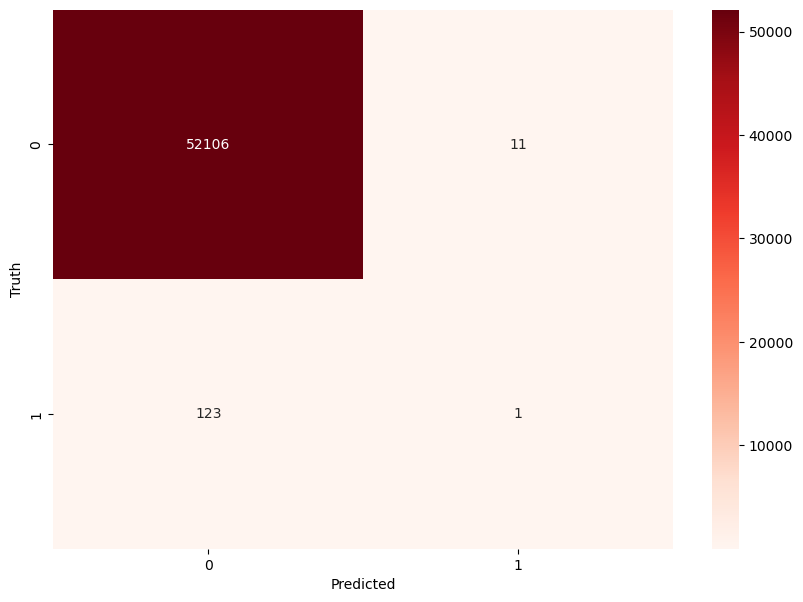

In [45]:
import seaborn as sns
# import confusion matrix
from sklearn.metrics import confusion_matrix
# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
#
sns.heatmap(cm, annot=True, cmap="Reds", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

- Compare with other model, XGBoost can a better performance (in terms of the f1-score)
- This also indicating that the model is learning instead of random guessing

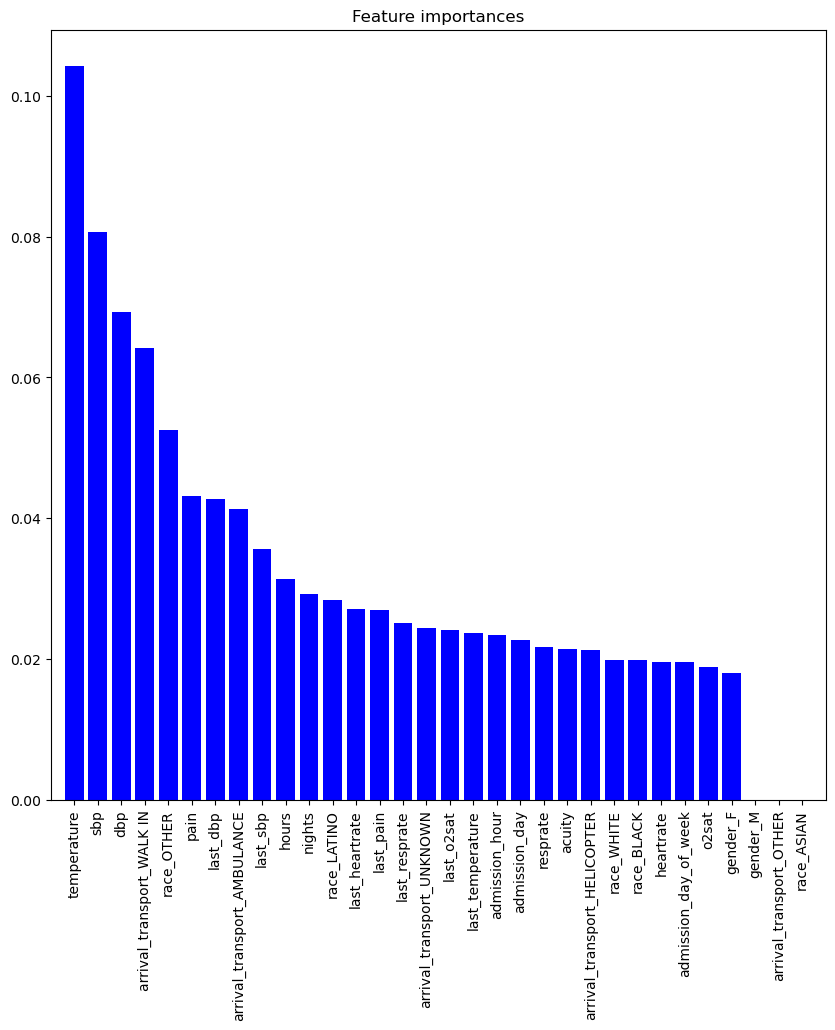

In [46]:
# plot the feature importance
importances = xgbc.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")   
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Summary

- The traditional machine learning models showed the possibility of predicting the outcome of the patients.
- Random Forest Classifier and XGBoost are able learn the data and predict the outcome of the patients.
- Even though the model performance is not better than the null model, it is still possible to predict the outcome of the patients.
- Belives that the hyperparameter tuning slightly improves the model performance.

## Next Steps
- Can try some data balance techniques to improve the model performance. (SMOTE, ADASYN)
- Hyperparameter tuning can be done to improve the model performance.
- Could look at more complex models to see if we can improve the performance 
- Will put more effort on Nerual Networks as suggested 
- The next model will be built with all features (including nlp features on text data)
- Feature Importance would also be another important aspect to look at (SHAP)